In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import numpy as np
from scipy import stats
import sklearn.cluster as cluster
import seaborn as sns


In [3]:
s123 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123.csv", sep=',')

cor, pval = stats.spearmanr(s123)
pval = pd.DataFrame(pval)
s123 = s123.corr(method = 'spearman')
s123

,S3-1,S1-High,S2-Relatively High,S1-Low,S3-3,S1-Medium Low,S2-Relatively Low,S1-Medium High,S3-2
S3-1,1.000000,0.715898,0.788121,-0.446312,-0.715069,-0.743998,-0.798841,-0.260187,-0.609655
S1-High,0.715898,1.000000,0.806524,-0.501366,-0.774600,-0.774051,-0.831028,-0.296518,-0.474577
S2-Relatively High,0.788121,0.806524,1.000000,-0.510408,-0.792458,-0.826469,-0.974737,-0.182661,-0.466313
S1-Low,-0.446312,-0.501366,-0.510408,1.000000,0.606138,0.599033,0.505541,-0.155910,0.233819
S3-3,-0.715069,-0.774600,-0.792458,0.606138,1.000000,0.780864,0.812191,0.103914,0.230558
S1-Medium Low,-0.743998,-0.774051,-0.826469,0.599033,0.780864,1.000000,0.831693,0.102925,0.451131
S2-Relatively Low,-0.798841,-0.831028,-0.974737,0.505541,0.812191,0.831693,1.000000,0.198334,0.438847
S1-Medium High,-0.260187,-0.296518,-0.182661,-0.155910,0.103914,0.102925,0.198334,1.000000,0.552215
S3-2,-0.609655,-0.474577,-0.466313,0.233819,0.230558,0.451131,0.438847,0.552215,1.000000


# Spearman Correlation

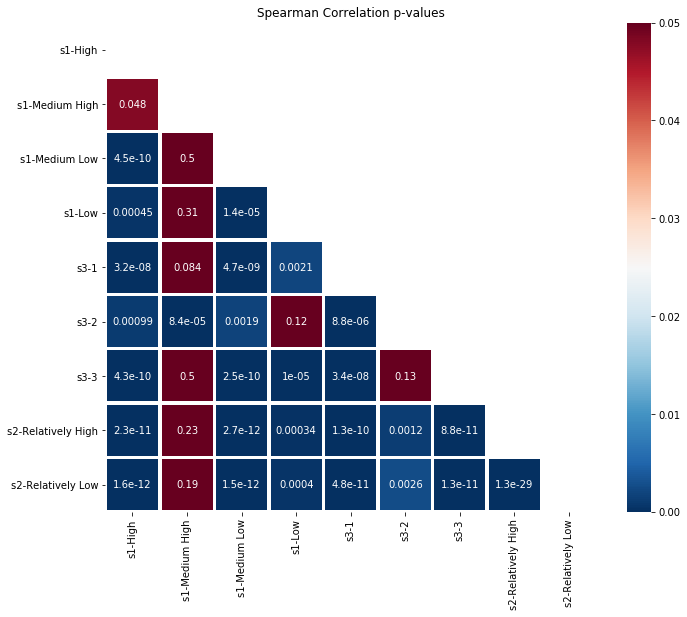

In [31]:
pval.columns = ['s1-High','s1-Medium High','s1-Medium Low','s1-Low','s3-1','s3-2','s3-3','s2-Relatively High','s2-Relatively Low']
pval.index = ['s1-High','s1-Medium High','s1-Medium Low','s1-Low','s3-1','s3-2','s3-3','s2-Relatively High','s2-Relatively Low']
mask = np.zeros_like(pval)
f, ax = plt.subplots(figsize=(11, 9))
mask[np.triu_indices_from(mask)] = True
plt.title("Spearman Correlation p-values")
iris = sns.heatmap(pval, mask=mask, cmap="RdBu_r", annot=True, linewidths=2.5, vmax=0.05, vmin=0 )
figure = iris.get_figure()    
figure.savefig('Spearman Correlation p-values.png', dpi=300)

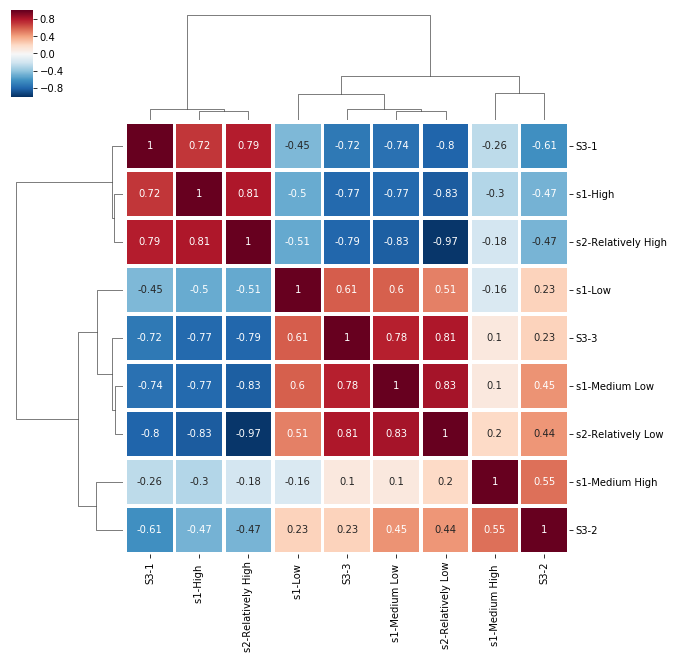

In [32]:
mask = np.zeros_like(s123)
# f, ax = plt.subplots(figsize=(11, 9))
mask[np.triu_indices_from(mask)] = True
# plt.title("Spearman Correlation between Certainty Categories")
iris = sns.clustermap(s123, cmap="RdBu_r", annot=True, linewidths=2.5, vmax=1.0, vmin=-1.0 )
# figure = iris.get_figure()    
iris.savefig('Spearman Correlation between Certainty Categories_small.png', dpi=500)

In [34]:
from sklearn.preprocessing import scale

s123 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123.csv", sep=',')
s123 = scale(np.asarray(s123))
s123 = pd.DataFrame(s123)
s123.columns = ['s1-High','s1-Medium High','s1-Medium Low','s1-Low','s3-1','s3-2','s3-3','s2-Relatively High','s2-Relatively Low']

# Biplot PCA S1, S2, S3.1 & S3.2

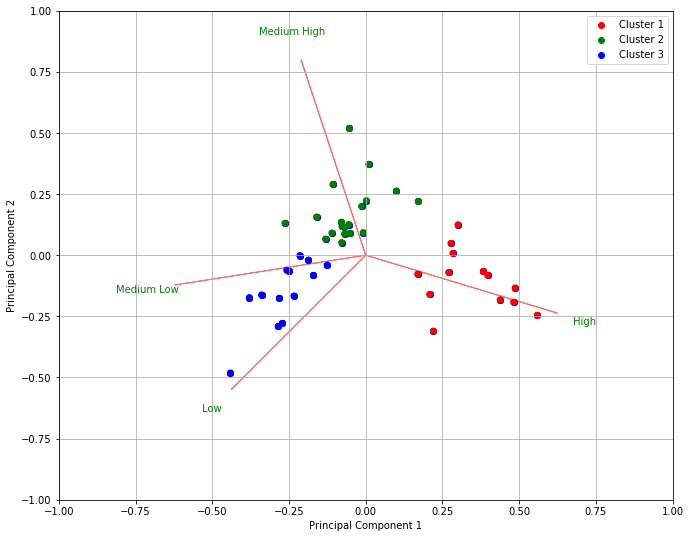

array([[ 1.42190447, -0.85551884, -1.2101169 , -0.48473773],
       [-0.50195732,  0.83035591,  0.07009103, -0.47478918],
       [-0.68827454, -0.35807826,  1.10767616,  1.17866038]])

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerLine2D
from sklearn import datasets
from sklearn.decomposition import PCA
# iris = datasets.load_iris()
m = (np.asarray(s123))
s1_array = (m[:, :4])
s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])

range_s123 = range(1,11)
s1_interia = []
s1 = pd.DataFrame(s1_array)
pcax1 = PCA(n_components=2).fit_transform(s1)
pcax1_dt = pd.DataFrame(pcax1)
pca = PCA()
pcax1 = pca.fit_transform(s1)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(s1.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['red','green','blue']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend()
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     plt.legend(handler_map={ax: HandlerLine2D(numpoints=4)})
#     plt.legend(handle = [])
#     # Plot the centroids as a white X
#     centroids = kmeans_model.cluster_centers_
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#     marker='x', s=169, linewidths=3,
#     color='b', zorder=10)
    
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "High", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Medium High", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[2,0], coeff[2,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, "Medium Low", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, labels[2], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[3,0], coeff[3,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[3,0]* 1.15, coeff[3,1] * 1.15, "Low", color = 'g', ha = 'center', va = 'center')
    else:
        plt.text(coeff[3,0]* 1.15, coeff[3,1] * 1.15, labels[3], color = 'g', ha = 'center', va = 'center')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax1[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s1.png', dpi = 500)
plt.show()
kmeans_model.cluster_centers_

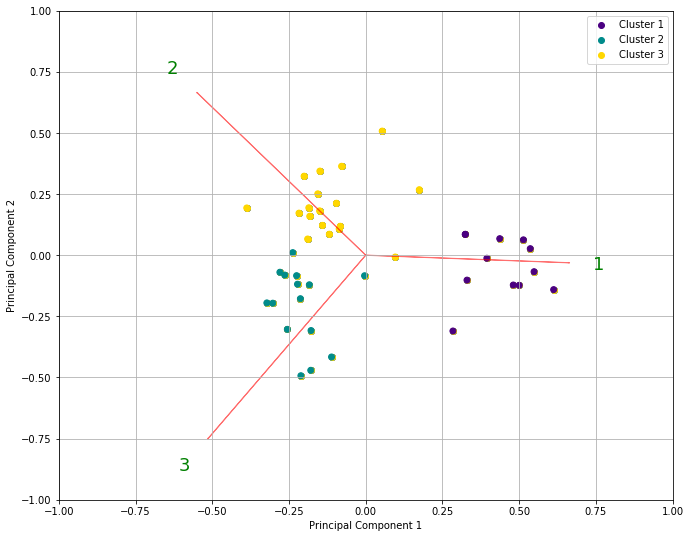

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# iris = datasets.load_iris()
m = (np.asarray(s123))
s1_array = (m[:, :4])
s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])

range_s123 = range(1,11)
s3_interia = []
s3= pd.DataFrame(s3_array)
pcax3 = PCA(n_components=2).fit_transform(s3)

pca = PCA()
pcax3 = pca.fit_transform(s3)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(s3.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = ['indigo','darkcyan','gold']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend()
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "1", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "2", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[2,0], coeff[2,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, "3", color = 'g', ha = 'center', va = 'center', fontsize=18)
    else:
        plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, labels[2], color = 'g', ha = 'center', va = 'center')


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax3[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s3.png', dpi = 500)
plt.show()


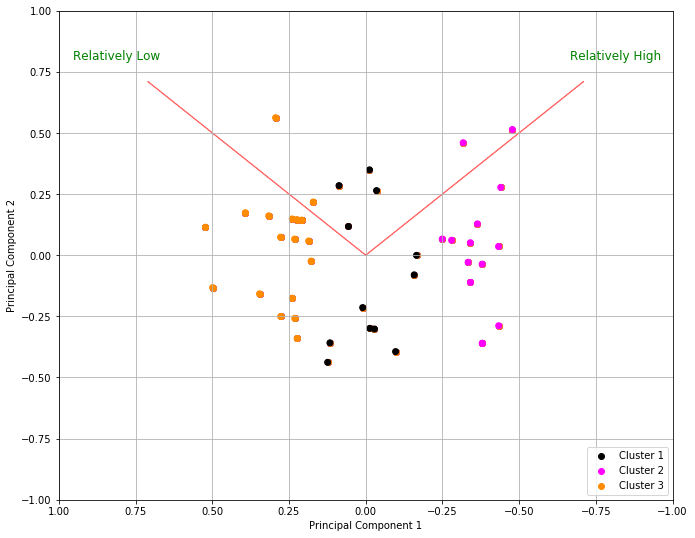

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# iris = datasets.load_iris()
m = (np.asarray(s123))
s1_array = (m[:, :4])
s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])

range_s123 = range(1,11)
s2_interia = []
s2= pd.DataFrame(s2_array)
pcax2 = PCA(n_components=2).fit_transform(s2)

pca = PCA()
pcax2 = pca.fit_transform(s2)

k = 3
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, init='random', random_state=1).fit(s2.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = colors = ['k','magenta','darkorange']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    c = ax.scatter(xs * scalex,ys * scaley, c = colors[2], label = 'Cluster 3')
    plt.legend(loc = 4)
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))
#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "Relatively High", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Relatively Low", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')



plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.gca().invert_xaxis()
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax2[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s2.1.png', dpi = 500)
plt.show()


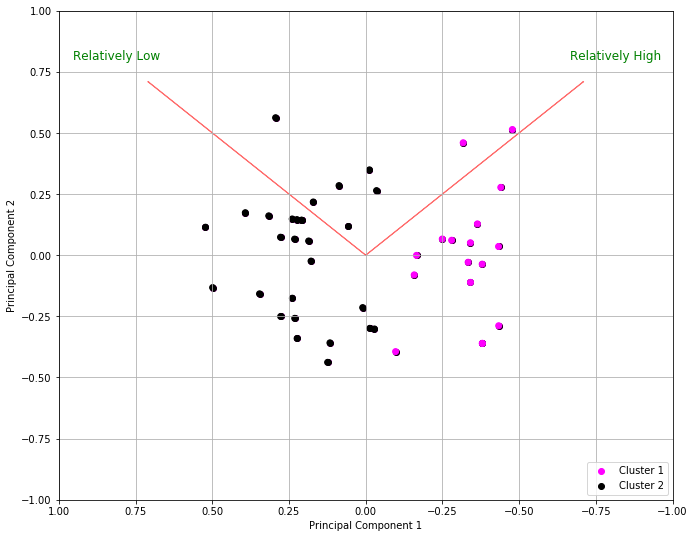

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
# iris = datasets.load_iris()
m = (np.asarray(s123))
s1_array = (m[:, :4])
s3_array = (m[:, 4:7])
s2_array = (m[:, 7:9])

range_s123 = range(1,11)
s2_interia = []
s2= pd.DataFrame(s2_array)
pcax2 = PCA(n_components=2).fit_transform(s2)

pca = PCA()
pcax2 = pca.fit_transform(s2)

k = 2
# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=k, random_state=1).fit(s2.iloc[:, :])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
y = kmeans_model.labels_
f, ax = plt.subplots(figsize=(11, 9))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = colors = ['magenta','k']
    a = ax.scatter(xs * scalex,ys * scaley, c = colors[0], label = 'Cluster 1')
    b = ax.scatter(xs * scalex,ys * scaley, c = colors[1], label = 'Cluster 2')
    plt.legend(loc = 4)
    d = ax.scatter(xs * scalex,ys * scaley, c = y, cmap=matplotlib.colors.ListedColormap(colors))#     for i in range(n):
    plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "Relatively High", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, labels[0], color = 'g', ha = 'center', va = 'center')

    plt.arrow(0, 0, coeff[1,0], coeff[1,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "Relatively Low", color = 'g', ha = 'center', va = 'center', fontsize=12)
    else:
        plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, labels[1], color = 'g', ha = 'center', va = 'center')



plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().invert_xaxis()
plt.xlabel("Principal Component {}".format(1))
plt.ylabel("Principal Component {}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pcax2[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('biplot_pca_s2.2.png', dpi = 500)
plt.show()


# Jaccard Similarity index.



In [162]:
from sklearn import metrics

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s1_array)
estx = cluster.KMeans(n_clusters=K)
X = pd.DataFrame(estx.fit_predict(s1_array), columns=['cluster ID'])
labelsx = estx.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s1_array))))
# estx = cluster.KMeans(n_clusters=K)
# X = pd.DataFrame(estx.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s1_array)))), columns=['cluster ID'])
# labelsx = estx.labels_

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s2_array)
esty = cluster.KMeans(n_clusters=K)
Y = pd.DataFrame(esty.fit_predict(s2_array), columns=['cluster ID'])
labelsy = esty.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s2_array))))
# esty = cluster.KMeans(n_clusters=K)
# Y = pd.DataFrame(esty.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s2_array)))), columns=['cluster ID'])
# labelsy = esty.labels_

K = 3
kmeans_model = KMeans(n_clusters=K).fit(s3_array)
estz = cluster.KMeans(n_clusters=K)
Z = pd.DataFrame(estz.fit_predict(s3_array), columns=['cluster ID'])
labelsz = estz.labels_

# K = 3
# kmeans_model = KMeans(n_clusters=K).fit(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s3_array))))
# estz = cluster.KMeans(n_clusters=K)
# Z = pd.DataFrame(estz.fit_predict(pd.DataFrame(PCA(n_components=2).fit_transform(pd.DataFrame(s3_array)))), columns=['cluster ID'])
# labelsz = estz.labels_

jaccard1 = metrics.jaccard_similarity_score(labelsy, labelsz)
jaccard2 = metrics.jaccard_similarity_score(labelsx, labelsz)
jaccard3 = metrics.jaccard_similarity_score(labelsy, labelsx)


print jaccard1
print jaccard2
print jaccard3

print labelsx
print labelsy
print labelsz

0.7555555555555555
0.7777777777777778
0.7111111111111111
[0 2 1 1 2 0 2 2 2 0 0 0 0 0 1 0 2 0 2 2 0 1 2 2 1 0 1 1 1 1 2 2 2 2 2 0 2
 1 2 2 1 1 1 0 2]
[0 2 1 2 1 2 2 2 2 0 0 0 0 0 1 0 2 0 0 2 0 1 0 0 1 2 1 1 1 1 0 0 0 0 2 0 2
 1 0 1 1 1 1 0 2]
[0 2 1 1 2 2 2 2 2 0 0 0 0 0 1 2 2 2 2 2 0 2 2 0 1 2 1 1 1 1 0 0 2 2 2 0 2
 1 0 2 1 1 1 0 0]


In [137]:
s1_2_3 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\clusters_1_2_3.csv", sep=';').set_index('statements')
s2_3 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\cluster_2_3.csv", sep=';').set_index('statements')
# s1_2 = s1_2_3[['s1', 's2']]
# s1_3 = s1_2_3[['s1', 's3']]
#comparativa 1-2 1-3 tomando 1 como referencia
s1_c1 = np.asarray(s1_2_3.iloc[0:13, 0])
s1_c2 = np.asarray(s1_2_3.iloc[13:32, 0])
s1_c3 = np.asarray(s1_2_3.iloc[32:46, 0])
s2_c1 = np.asarray(s1_2_3.iloc[0:13, 1])
s2_c2 = np.asarray(s1_2_3.iloc[13:32, 1])
s2_c3 = np.asarray(s1_2_3.iloc[32:46, 1])
s3_c1 = np.asarray(s1_2_3.iloc[0:13, 2])
s3_c2 = np.asarray(s1_2_3.iloc[13:32, 2])
s3_c3 = np.asarray(s1_2_3.iloc[32:46, 2])
#comparativa 2-3 tomando 2 como referencia

jaccard1_2__1_1 = metrics.jaccard_similarity_score(s1_c1, s2_c1)
# jaccard1_2__1_2 = metrics.jaccard_similarity_score(s1_c1, s2_c2)
jaccard1_2__1_3 = metrics.jaccard_similarity_score(s1_c1, s2_c3)

# jaccard1_2__2_1 = metrics.jaccard_similarity_score(s1_c2, s2_c1)
jaccard1_2__2_2 = metrics.jaccard_similarity_score(s1_c2, s2_c2)
# jaccard1_2__2_3 = metrics.jaccard_similarity_score(s1_c2, s2_c3)

jaccard1_2__3_1 = metrics.jaccard_similarity_score(s1_c3, s2_c1)
# jaccard1_2__3_2 = metrics.jaccard_similarity_score(s1_c3, s2_c2)
jaccard1_2__3_3 = metrics.jaccard_similarity_score(s1_c3, s2_c3)

print jaccard1_2__1_1
# print jaccard1_2__1_2
print jaccard1_2__1_3

# print jaccard1_2__2_1
print jaccard1_2__2_2
# print jaccard1_2__2_3

print jaccard1_2__3_1
# print jaccard1_2__3_2
print jaccard1_2__3_3

jaccard1_3__1_1 = metrics.jaccard_similarity_score(s1_c1, s3_c1)
# jaccard1_3__1_2 = metrics.jaccard_similarity_score(s1_c1, s3_c2)
jaccard1_3__1_3 = metrics.jaccard_similarity_score(s1_c1, s3_c3)

# jaccard1_3__2_1 = metrics.jaccard_similarity_score(s1_c2, s3_c1)
jaccard1_3__2_2 = metrics.jaccard_similarity_score(s1_c2, s3_c2)
# jaccard1_3__2_3 = metrics.jaccard_similarity_score(s1_c2, s3_c3)

jaccard1_3__3_1 = metrics.jaccard_similarity_score(s1_c3, s3_c1)
# jaccard1_3__3_2 = metrics.jaccard_similarity_score(s1_c3, s3_c2)
jaccard1_3__3_3 = metrics.jaccard_similarity_score(s1_c3, s3_c3)

print jaccard1_3__1_1
# print jaccard1_3__1_2
print jaccard1_3__1_3

# print jaccard1_3__2_1
print jaccard1_3__2_2
# print jaccard1_3__2_3

print jaccard1_3__3_1
# print jaccard1_3__3_2
print jaccard1_3__3_3

#comparativa 2-3 tomando 2 como referencia
s2_c1 = np.asarray(s2_3.iloc[0:14, 0])
s2_c2 = np.asarray(s2_3.iloc[14:26, 0])
s2_c3 = np.asarray(s2_3.iloc[26:46, 0])
s3_c1 = np.asarray(s2_3.iloc[0:14, 1])
s3_c2 = np.asarray(s2_3.iloc[14:26, 1])
s3_c3 = np.asarray(s2_3.iloc[26:46, 1])

jaccard2_3__1_1 = metrics.jaccard_similarity_score(s2_c1, s3_c1)
# jaccard2_3__1_2 = metrics.jaccard_similarity_score(s2_c1, s3_c2)
# jaccard2_3__1_3 = metrics.jaccard_similarity_score(s2_c1, s3_c3)

# jaccard2_3__2_1 = metrics.jaccard_similarity_score(s2_c2, s3_c1)
jaccard2_3__2_2 = metrics.jaccard_similarity_score(s2_c2, s3_c2)
# jaccard2_3__2_3 = metrics.jaccard_similarity_score(s2_c2, s3_c3)

# jaccard2_3__3_1 = metrics.jaccard_similarity_score(s2_c3, s3_c1)
# jaccard2_3__3_2 = metrics.jaccard_similarity_score(s2_c3, s3_c2)
jaccard2_3__3_3 = metrics.jaccard_similarity_score(s2_c3, s3_c3)

print jaccard2_3__1_1
# print jaccard2_3__1_2
# print jaccard2_3__1_3

# print jaccard2_3__2_1
print jaccard2_3__2_2
# print jaccard2_3__2_3

# print jaccard2_3__3_1
# print jaccard2_3__3_2
print jaccard2_3__3_3


0.9230769230769231
0.0
0.47368421052631576
0.0
0.8461538461538461
0.9230769230769231
0.0
0.7368421052631579
0.0
0.6923076923076923
0.7857142857142857
0.8333333333333334
0.6842105263157895


# Recall  Precision  Overall accuracy

In [15]:
### from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pycm import *


mode = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\st_45_ground_truth_participants_3l.csv", sep=';', header = None)
file_gt_s3 = "C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_ground_truth_author_3l.csv"
me_answer_s3 = pd.read_csv(file_gt_s3, delimiter='\t', header=None)
me_lista_s3 = []
        
for j,i in enumerate(range(0,45)):
    if me_answer_s3.iloc[i,1] == 2:
        me_lista_s3.append(2)
    elif me_answer_s3.iloc[i,1] == 3:
        me_lista_s3.append(3)
    else:
        me_lista_s3.append(1)
        
def SE_multiclass(name, cnf_matrix):
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = (TP/(TP+FN))
#     print "Sensitivity, hit rate, recall, or true positive rate: ", TPR
#     # Specificity or true negative rate
#     TNR = (TN/(TN+FP))
# #     print "Specificity or true negative rate: ", TNR
#     # Precision or positive predictive value
    PPV = TP/(TP+FP)
#     print "Precision or positive predictive value: ", PPV
    # Negative predictive value
#     NPV = TN/(TN+FN)
# #     print "Negative predictive value: ", NPV
#     # Fall out or false positive rate
#     FPR = FP/(FP+TN)
# #     print "Fall out or false positive rate: ", FPR
#     # False negative rate
#     FNR = FN/(TP+FN)
# #     print "False negative rate: ", FNR
#     # False discovery rate
#     FDR = FP/(TP+FP)
# #     print "False discovery rate: ", FDR
#     # F-score
#     FS = (TPR*PPV*2)/(TPR+PPV)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
#     print "Overall accuracy: ", ACC
    
    final_list = list(zip(TPR, PPV, ACC)) #list(zip(TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC, FS))
    final_list = pd.DataFrame(final_list)
    final_list.columns=['Recall','Precision','Overall accuracy']
#     final_list.index = list(len(range(FNR)))
#     print FP
#     print final_list
#     final_list.to_csv(name+'.csv', sep=';')
    return final_list

classes_model_3221_results_45 = [2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 3, 1]

# print(classification_report(me_lista_s3, mode.iloc[2,0:45]))
cm_s3_me = confusion_matrix(mode.iloc[2,0:45], me_lista_s3)
cm_s3_me = SE_multiclass('S3_SS_me',cm_s3_me)

cm_s3_model = confusion_matrix(mode.iloc[2,0:45].tolist(), classes_model_3221_results_45)
cm_s3_model = SE_multiclass('S3_SS_model',cm_s3_model)

print cm_s3_me
print '\n'
print cm_s3_model

     Recall  Precision  Overall accuracy
0  0.923077   0.857143          0.933333
1  0.947368   0.692308          0.800000
2  0.384615   1.000000          0.822222


     Recall  Precision  Overall accuracy
0  0.785714   0.785714          0.866667
1  0.807692   0.777778          0.755556
2  0.200000   0.250000          0.844444


# Q2 vs Q1 Correlation between Certainty statements

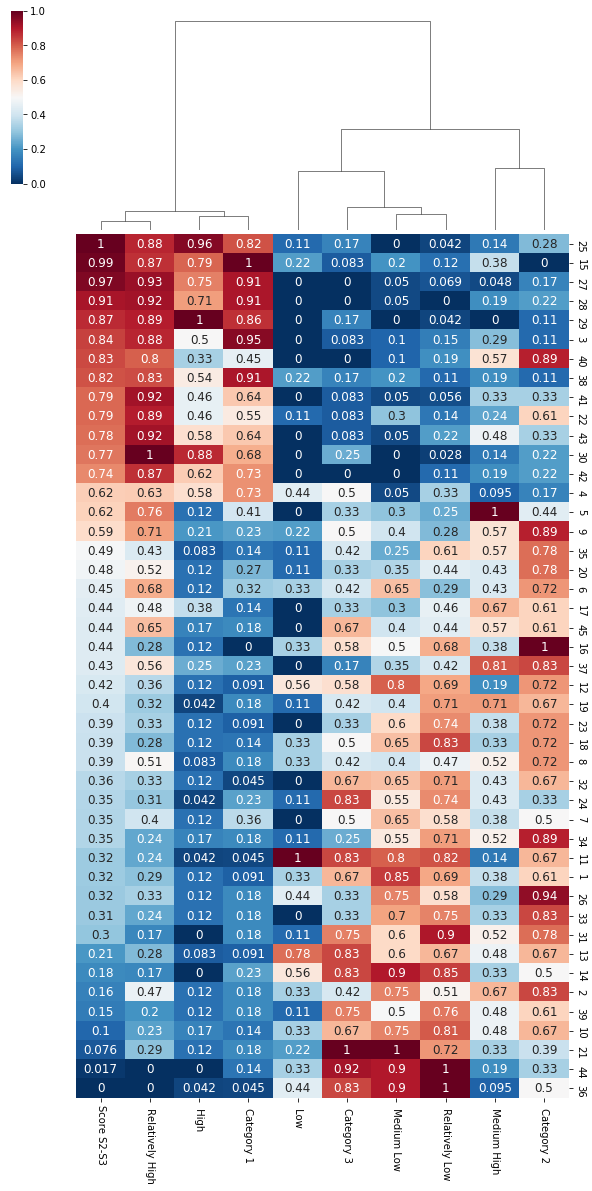

In [15]:
s123 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\comparative_s2s3_q2_s1_s2_s3_q1.csv", sep=';')
ss =  pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\comparative_s2s3_q2_s1_s2_s3_q1_raw.csv", index_col = 'statements', sep=';')

# ss.index = ["Score S2-S3"," High "," Relatively High"," Category 1"," Medium Low "," Low "," Relatively Low"," Category 3"," Medium High "," Category 2"]
ss = scale(ss)
# cor, pval = stats.spearmanr(s123)
ss = pd.DataFrame(ss)
# ss = ss.corr(method = 'spearman')
ss.columns = ["Score S2-S3"," High "," Relatively High"," Category 1"," Medium High "," Category 2"," Medium Low "," Low "," Relatively Low"," Category 3"]
ss.index = [25,15,27,28,29,3,40,38,41,22,43,30,42,4,5,9,35,20,6,17,45,16,37,12,19,23,18,8,32,24,7,34,11,1,26,33,31,13,14,2,39,10,21,44,36]
iris = sns.clustermap(ss,row_cluster = False,col_cluster = True ,standard_scale = 1, metric= 'correlation', cmap="RdBu_r", center =0.5, annot = True,annot_kws={"size": 12}, cbar_kws={"shrink": .5}, linewidths = 0, figsize=[10,20])
plt.setp(iris.ax_heatmap.get_xticklabels(), rotation=270)
plt.setp(iris.ax_heatmap.get_yticklabels(), rotation=270)
iris.savefig('Q2 vs Q1 Correlation between Certainty statements.png', dpi=500)

# Survey 1 - Answer Comparison // Participants vs. Mario

In [21]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn import datasets, linear_model
import codecs
import pandas as pd
import numpy as np
from scipy import stats
import csv

results_s1 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\resultados-s1.csv", sep=';')
# print results_s2
order1 = {}
for j, i in enumerate(range(0,45)):
    order1[results_s1.iloc[j,0]] = results_s1.iloc[j, 6]#.replace(',','.')

FILE = "C:\\Users\\marpr\\Desktop\\docto\\cosine_participants_s1.csv"
file_gt = "C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_ground_truth_4l.csv"
my_dic = {}
order_part = {}
# fin = codecs.open(FILE,"r",  encoding='utf8')
me_answer = pd.read_csv(file_gt, delimiter='\t', header=None)
answers = pd.read_csv(FILE, delimiter=',', header=None)

fin = open(FILE, 'r').readlines()
   
for j,i in enumerate(range(0,45)):
    if me_answer.iloc[i,1] == 4:
        my_dic[j+1] = -1
    elif me_answer.iloc[i,1] == 3:
        my_dic[j+1] = -0.5
    elif me_answer.iloc[i,1] == 2:
        my_dic[j+1] = 0.5
    else:
        my_dic[j+1] = me_answer.iloc[i,1]
p = []
p1 = []
general = {}
for l, i in enumerate(fin):
    level = i.split(',')
    x_in = []#yo
    x_out = []
    y_in = []
    final = []
    for j,k in enumerate(level):
        k = k.replace('\n', '')
        k = k.replace(' ', '')
        if len(k) == 0:
            continue
        k = k.replace('3', '-0.5')
        k = k.replace('2', '0.5')
        k = k.replace('1', '1')
        k = k.replace('4', '-1')
        x_out.append(float(k))
        x_in.append(my_dic[j+1])
        y_in.append(order1[j+1])
    if len(x_out) == 21:
        x_out.pop()
    if len(x_in) == 21:
        x_in.pop()
#     print l
#     print x_in
#     print len(x_in)
#     print x_out
#     print len(x_out)
    x_in = np.asarray(x_in)
    x_out = np.asarray(x_out)
    y_in = np.asarray(y_in).astype(np.float)
    order_part[l+1] = (cs(x_in.reshape(1,-1),x_out.reshape(1,-1)))[0][0]
    final = [order_part[l+1], np.mean(y_in), np.median(y_in)]
    p.append([order_part[l+1]])
    p1.append([np.mean(y_in)])
    general[l+1]=(final)
df = pd.DataFrame(general).T
df.columns = ['index', 'mean', 'median']

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(p, p1)
regresion = regr.predict(p)
df['regresion'] = regresion

d_c = df['index'].value_counts().reset_index()
d_c.columns = ['index', 'counter']
df_f1 = pd.merge(df, d_c, on='index', how='inner')

x = 0
for i in order_part.values():
#     print i
    if i < 0:
        x = x + 1
    else:
        pass
y = ((101 - x)*100)/101
y
# 89.1% de coincidencia //calcular exacto

In [22]:
trace1 = go.Scatter(
        x = df_f1['index'],
        y = df_f1['mean'],
        mode = 'markers',
        name = 'participants')

tracelog = go.Scatter(
    x = df['index'],
    y = df['regresion'],
    mode = 'lines',
    line=dict(color='blue', width=3),
    name = 'linear regression'
    )

layout = go.Layout(
    title = 'Survey 1 - Answer Comparison // Participants vs. Mario',
    xaxis=dict(
         range = [-1,1],
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
data = [trace1, tracelog]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.iplot(fig)

# Survey 2 - Answer Comparison // Participants vs. Mario

In [38]:
results_s2 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\resultados-s2.csv", sep=';')
# print results_s2
order2 = {}
for j, i in enumerate(range(0,45)):
    order2[results_s2.iloc[j,0]] = results_s2.iloc[j, 4]#.replace(',','.')

FILE = "C:\\Users\\marpr\\Desktop\\docto\\cosine_participants_s2 - copia.csv"
file_gt = "C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_ground_truth_2l.csv"
my_dic = {}
order_part = {}
# fin = codecs.open(FILE,"r",  encoding='utf-8')
me_answer = pd.read_csv(file_gt, delimiter='\t', header=None)
answers = pd.read_csv(FILE, delimiter=',', header=None)

fin = open(FILE, 'r').readlines()
   
for j,i in enumerate(range(0,45)):
    if me_answer.iloc[i,1] == 0:
        my_dic[j+1] = -1
#     elif me_answer.iloc[i,1] == 3:
#         my_dic[j+1] = -1
    else:
        my_dic[j+1] = me_answer.iloc[i,1]
p = []
p1 = []
general = {}
for l, i in enumerate(fin):
    level = i.split(',')
    x_in = []#yo
    x_out = []
    y_in = []
    final = []
    for j,k in enumerate(level):
        k = k.replace('\n', '')
        k = k.replace(' ', '')
        if len(k) == 0:
            continue
        k = k.replace('2', '-1')
        k = k.replace('1', '1')
        x_out.append(float(k))
        x_in.append(my_dic[j+1])
        y_in.append(order2[j+1])
    if len(x_out) == 21:
        x_out.pop()
    if len(x_in) == 21:
        x_in.pop()
#     print l
#     print x_in
#     print len(x_in)
#     print x_out
#     print len(x_out)
    x_in = np.asarray(x_in)
    x_out = np.asarray(x_out)
    y_in = np.asarray(y_in).astype(np.float)
    order_part[l+1] = (cs(x_in.reshape(1,-1),x_out.reshape(1,-1)))[0][0]
    final = [order_part[l+1], np.mean(y_in), np.median(y_in)]
    p.append([order_part[l+1]])
    p1.append([np.mean(y_in)])
    general[l+1]=(final)
df = pd.DataFrame(general).T
df.columns = ['index', 'mean', 'median']

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(p, p1)
regresion = regr.predict(p)
df['regresion'] = regresion

d_c = df['index'].value_counts().reset_index()
d_c.columns = ['index', 'counter']
df_f2 = pd.merge(df, d_c, on='index', how='inner')

x = 0
for i in order_part.values():
#     print i
    if i >= 0:
        x = x + 1
    else:
        pass
print x
# # len(order_part)
# 13700/150

#Coincidencia del 91% // Medir exacto

In [37]:
trace2 = go.Scatter(
        x = df_f2['index'],
        y = df_f2['mean'],
        mode = 'markers',
        name = 'participants')

tracelog = go.Scatter(
    x = df['index'],
    y = df['regresion'],
    mode = 'lines',
    line=dict(color='blue', width=3),
    name = 'linear regression'
    )

layout = go.Layout(
    title = 'Survey 2 - Answer Comparison // Participants vs. Mario',
    xaxis=dict(
         range = [-1,1],
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
data = [trace2, tracelog]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.iplot(fig, filename='basic-scatter')

# Survey 3 - Answer Comparison // Participants vs. Mario

In [25]:
results_s3 = pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\resultados-s3.csv", sep=';')
# print results_s3
order3 = {}
for j, i in enumerate(range(0,45)):
    order3[results_s3.iloc[j,0]] = results_s3.iloc[j, 5]#.replace(',','.')


FILE = "C:\\Users\\marpr\\Desktop\\docto\\cosine_participants_s3.csv"
file_gt = "C:\\Users\\marpr\\Desktop\\docto\\elsevier\\statements\\st_45_3l_mias.csv"
my_dic = {}
order_part = {}
fin = codecs.open(FILE,"r",  encoding='utf8')
me_answer = pd.read_csv(file_gt, delimiter='\t', header=None)
answers = pd.read_csv(FILE, delimiter=',', header=None)

for j,i in enumerate(range(0,45)):
    if me_answer.iloc[i,1] == 2:
        my_dic[j+1] = 0
    elif me_answer.iloc[i,1] == 3:
        my_dic[j+1] = -1
    else:
        my_dic[j+1] = me_answer.iloc[i,1]
p = []
p1 = []
general = {}
for l, i in enumerate(fin):
    level = i.split(',')
    x_in = []#yo
    x_out = []
    y_in = []
    final = []
    for j,k in enumerate(level):
        k = k.replace('\r\n', '')
        if len(k) == 0:
            continue
        k = k.replace('3', '-1')
        k = k.replace('2', '0')
        k = k.replace('1', '1')
        x_out.append(float(k))
        x_in.append(my_dic[j+1])
        y_in.append(order3[j+1])
    if len(x_out) == 21:
        x_out.pop()
    if len(x_in) == 21:
        x_in.pop()
#     print l
#     print x_in
#     print len(x_in)
#     print x_out
#     print len(x_out)
    x_in = np.asarray(x_in)
    x_out = np.asarray(x_out)
    y_in = np.asarray(y_in).astype(np.float)
    order_part[l+1] = (cs(x_in.reshape(1,-1),x_out.reshape(1,-1)))[0][0]
    final = [order_part[l+1], np.mean(y_in), np.median(y_in)]
    p.append([order_part[l+1]])
    p1.append([np.mean(y_in)])
    general[l+1]=(final)
df = pd.DataFrame(general).T
df.columns = ['index', 'mean', 'median']

regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(p, p1)
regresion = regr.predict(p)
df['regresion'] = regresion
    
d_c = df['index'].value_counts().reset_index()
d_c.columns = ['index', 'counter']
df_f3 = pd.merge(df, d_c, on='index', how='inner')


x = 0
for i in order_part.values():
#     print i
    if i >= 0:
        x = x + 1
    else:
        pass
# print x
# len(order_part)
# 3900/44
x
# 89.4% de exactitud // Medir con exactitud y retirando outlier de nuevo

In [26]:
trace3 = go.Scatter(
        x = df_f3['index'],
        y = df_f3['mean'],
        mode = 'markers',
        name = 'participants')

tracelog = go.Scatter(
    x = df['index'],
    y = df['regresion'],
    mode = 'lines',
    line=dict(color='blue', width=3),
    name = 'linear regression'
    )

layout = go.Layout(
    title = 'Survey 3 - Answer Comparison // Participants vs. Mario',
    xaxis=dict(
        range = [-1,1],
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.05,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
        
    )
)
data = [trace3, tracelog]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.iplot(fig, filename='basic-scatter')

# Confidence Intervals and Z - Score // Survey 1

In [2]:
import scipy
ci = (pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\s1_ci_zscore.csv", sep=';')).set_index(['statements'])
# p_values = scipy.stats.norm.sf(abs(z_scores))
dic_ci_neg = {}
dic_ci_pos = {}
dic_z_score = {}
dic_dif = {}
dic_kw = {}
for h, i in enumerate(np.asarray(ci)):
#     ci = list(i)
    kw = -100
    for j, u in enumerate(i[0:4]):
        if u > kw:
            kw = u
            pos = j
    dic_kw[h+1] = float(kw.replace(',','.'))
    if pos == 0:
        dic_ci_neg[h+1] = float(i[4].replace(',','.'))
        dic_ci_pos[h+1] = float(i[5].replace(',','.'))
        dic_dif[h+1] = float(i[5].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[12].replace(',','.'))))
    if pos == 1:
        dic_ci_neg[h+1] = float(i[6].replace(',','.'))
        dic_ci_pos[h+1] = float(i[7].replace(',','.'))
        dic_dif[h+1] = float(i[7].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[13].replace(',','.'))))

    if pos == 2:
        dic_ci_neg[h+1] = float(i[8].replace(',','.'))
        dic_ci_pos[h+1] = float(i[9].replace(',','.'))
        dic_dif[h+1] = float(i[9].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[14].replace(',','.'))))

    if pos == 3:
        dic_ci_neg[h+1] = float(i[10].replace(',','.'))
        dic_ci_pos[h+1] = float(i[11].replace(',','.'))
        dic_dif[h+1] = float(i[11].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[15].replace(',','.'))))







In [3]:
trace0 = go.Bar(
    x = range(1,46),
    y = dic_kw.values(),
    error_y=dict(
            type='data',
            thickness=1,
            array=dic_dif.values(),
            visible=True),
    name = "Weighted Kappa"
#     mode = 'markers'
)
# trace1 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_neg.values(),
#     mode = 'markers'
# )

# trace2 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_pos.values(),
#     mode = 'markers'
# )

trace3 = go.Scatter(
    x =  np.asarray([0,46]),
    y = np.asarray([0.2001, 0.2001]),
    mode = 'lines',
    name = 'Minimum Agreement')

trace4 = go.Scatter(
    x = range(1,46),
    y = dic_z_score.values(),
    mode = 'markers',
    marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 10),
    name = "Z - Score"
)

data = [trace0, trace3]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ),
    showlegend=False,
    title = 'Survey 1 - G index - 90% Confidence Interval',
    xaxis=dict(
        overlaying= 'y', 
        title= 'Statements',
        range = (0,46),
        showgrid=False,
#         tickmode='array',
        tickvals=range(1,46),
        tickmode='array',
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title= 'G Index',
        range = (-0.2,1),
        showgrid=False,
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


# Confidence Intervals and Z - Score // Survey 2

In [4]:
import scipy
ci = (pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\s2_ci_zscore.csv", sep=';')).set_index(['statements'])
# p_values = scipy.stats.norm.sf(abs(z_scores))
dic_ci_neg = {}
dic_ci_pos = {}
dic_z_score = {}
dic_dif = {}
dic_kw = {}
for h, i in enumerate(np.asarray(ci)):
#     ci = list(i)
    kw = -100
    for j, u in enumerate(i[0:2]):
        if u > kw:
            kw = u
            pos = j
    dic_kw[h+1] = float(kw.replace(',','.'))
    if pos == 0:
        dic_ci_neg[h+1] = float(i[2].replace(',','.'))
        dic_ci_pos[h+1] = float(i[3].replace(',','.'))
        dic_dif[h+1] = float(i[3].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[6].replace(',','.'))))
    if pos == 1:
        dic_ci_neg[h+1] = float(i[4].replace(',','.'))
        dic_ci_pos[h+1] = float(i[5].replace(',','.'))
        dic_dif[h+1] = float(i[5].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[7].replace(',','.'))))

#     if pos == 2:
#         dic_ci_neg[h+1] = float(i[6].replace(',','.'))
#         dic_ci_pos[h+1] = float(i[7].replace(',','.'))
#         dic_dif[h+1] = float(i[7].replace(',','.'))-float(kw.replace(',','.'))
#         dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[14].replace(',','.'))))

#     if pos == 3:
#         dic_ci_neg[h+1] = float(i[8].replace(',','.'))
#         dic_ci_pos[h+1] = float(i[9].replace(',','.'))
#         dic_dif[h+1] = float(i[9].replace(',','.'))-float(kw.replace(',','.'))
#         dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[15].replace(',','.'))))







In [5]:
trace0 = go.Bar(
    x = range(1,46),
    y = dic_kw.values(),
    error_y=dict(
            type='data',
            thickness=1,
            array=dic_dif.values(),
            visible=True),
    name = "G Index"
#     mode = 'markers'
)
# trace1 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_neg.values(),
#     mode = 'markers'
# )

# trace2 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_pos.values(),
#     mode = 'markers'
# )

trace3 = go.Scatter(
    x =  np.asarray([0,46]),
    y = np.asarray([0.2001, 0.2001]),
    mode = 'lines',
    name = 'Minimum Agreement')

trace4 = go.Scatter(
    x = range(1,46),
    y = dic_z_score.values(),
    mode = 'markers',
    marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 10),
    name = "Z - Score"
)

data = [trace0, trace3]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ),
    showlegend=False,
    title = 'Survey 2 - G Index - 90% Confidence Interval',
    xaxis=dict(
        title = 'Statements',
        range = (0,46),
        showgrid=False,
#         tickmode='array',
        tickvals=range(1,46),
        tickmode='array',
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title= 'G Index',
        range = (-0.2,1),
        showgrid=False,
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


# Confidence Intervals and Z - Score // Survey 3

In [6]:
import scipy
ci = (pd.read_csv("C:\\Users\\marpr\\Desktop\\docto\\s3_ci_zscore.csv", sep=';')).set_index(['statements'])
# p_values = scipy.stats.norm.sf(abs(z_scores))
dic_ci_neg = {}
dic_ci_pos = {}
dic_z_score = {}
dic_dif = {}
dic_kw = {}
for h, i in enumerate(np.asarray(ci)):
#     ci = list(i)
    kw = -100
    for j, u in enumerate(i[0:3]):
        if u > kw:
            kw = u
            pos = j
    dic_kw[h+1] = float(kw.replace(',','.'))
    if pos == 0:
        dic_ci_neg[h+1] = float(i[3].replace(',','.'))
        dic_ci_pos[h+1] = float(i[4].replace(',','.'))
        dic_dif[h+1] = float(i[4].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[9].replace(',','.'))))
    if pos == 1:
        dic_ci_neg[h+1] = float(i[5].replace(',','.'))
        dic_ci_pos[h+1] = float(i[6].replace(',','.'))
        dic_dif[h+1] = float(i[6].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[10].replace(',','.'))))

    if pos == 2:
        dic_ci_neg[h+1] = float(i[7].replace(',','.'))
        dic_ci_pos[h+1] = float(i[8].replace(',','.'))
        dic_dif[h+1] = float(i[8].replace(',','.'))-float(kw.replace(',','.'))
        dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[11].replace(',','.'))))

#     if pos == 3:
#         dic_ci_neg[h+1] = float(i[10].replace(',','.'))
#         dic_ci_pos[h+1] = float(i[11].replace(',','.'))
#         dic_dif[h+1] = float(i[11].replace(',','.'))-float(kw.replace(',','.'))
#         dic_z_score[h+1] = 1-scipy.stats.norm.sf(abs(float(i[15].replace(',','.'))))







In [7]:
trace0 = go.Bar(
    x = range(1,46),
    y = dic_kw.values(),
    error_y=dict(
            thickness=1,
            type='data',
            array=dic_dif.values(),
            visible=True),
    name = "G Index"
#     mode = 'markers'
)
# trace1 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_neg.values(),
#     mode = 'markers'
# )

# trace2 = go.Scatter(
#     x = range(1,46),
#     y = dic_ci_pos.values(),
#     mode = 'markers'
# )

trace3 = go.Scatter(
    x =  np.asarray([0,46]),
    y = np.asarray([0.2001, 0.2001]),
    mode = 'lines',
    name = 'Minimum Agreement')

trace4 = go.Scatter(
    x = range(1,46),
    y = dic_z_score.values(),
    mode = 'markers',
    marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 10),
    name = "Z - Score"
)

data = [trace0, trace3]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    margin=go.layout.Margin(
        l=100,
        r=100,
        b=100,
        t=100,
        pad=4
    ),
    showlegend=False,
    title = 'Survey 3 - G Index - 90% Confidence Interval',
    xaxis=dict(
        title = 'Statements',
        range = (0,46),
        showgrid=False,
#         tickmode='array',
        tickvals=range(1,46),
        tickmode='array',
        ticks='outside',
        tick0=0,
        dtick=1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        title = 'G Index',
        range = (-0.2,1),
        showgrid=False,
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.1,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
